<a href="https://colab.research.google.com/github/fionamorrow/PHSX-218/blob/main/PHSX218_Lab9_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

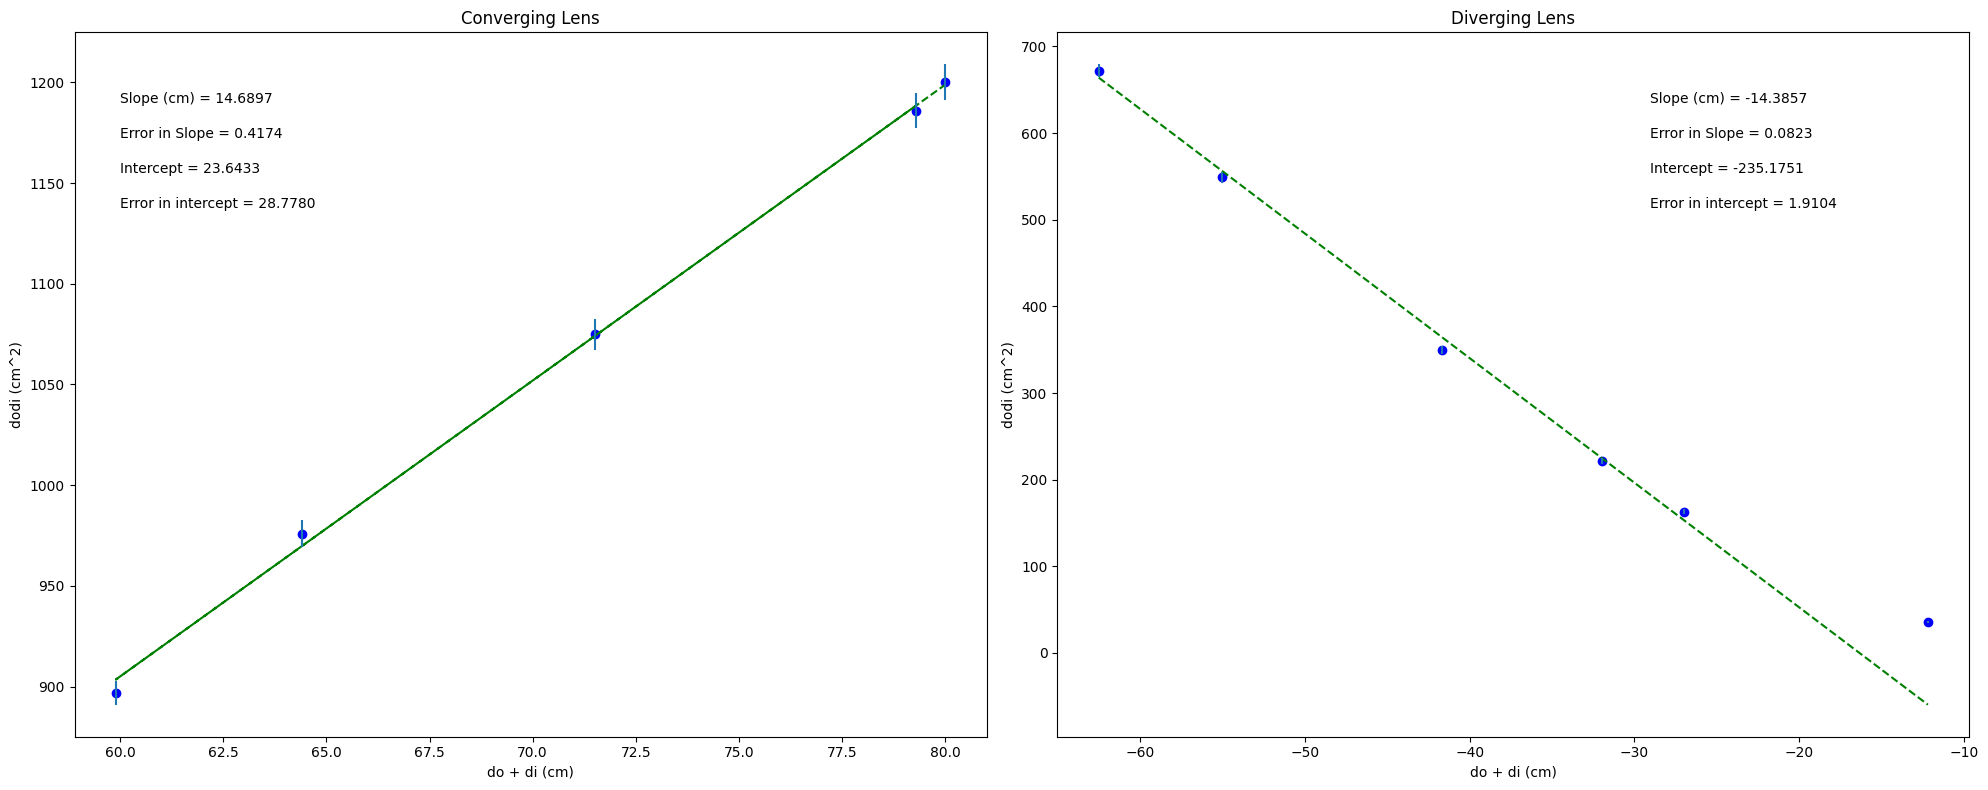

In [7]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated September 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#----------UPDATE THIS SECTION!!!----------

#DATA TO BE PLOTTED (Graph 1)
xvariable_do_di_conv = np.array([79.3, 59.9, 64.4, 71.5, 80])
yvariable_dodi_conv = np.array([1186, 897, 976, 1075, 1200])
err_yvariable_dodi_conv = np.array([8.85, 5.99, 6.63, 7.70, 8.94])

#DATA FOR GRAPH 2 (Graph 2)
xvariable_do_di_div = np.array([-62.5, -55, -41.7, -32, -27, -12.2])
yvariable_dodi_div = np.array([672.1, 548.9, 349.2, 221.2, 162.9, 36.2])
err_yvariable_dodi_div = np.array([7.16, 6.21, 4.56, 3.41, 2.84, 1.24])

#Re-assign variables for graph 1
x = xvariable_do_di_conv
y = yvariable_dodi_conv
dy = err_yvariable_dodi_conv

#Graph 2
x2 = xvariable_do_di_div
y2 = yvariable_dodi_div
dy2 = err_yvariable_dodi_div

#Labels for both graphs
plot_title1 = 'Converging Lens'
x_label1 = 'do + di (cm)'
y_label1 = 'dodi (cm^2)'
slope_units1 = 'cm'

plot_title2 = 'Diverging Lens'  # Update this
x_label2 = 'do + di (cm)'          # Update this
y_label2 = 'dodi (cm^2)'          # Update this
slope_units2 = 'cm'             # Update this

annotation_placement_1 = 2
annotation_placement_2 = 1

#-----------------------------------------------------------------------#
#-----DON'T NEED TO CHANGE ANYTHING BEYOND THIS POINT!!!-----

# Function to create a single plot
def create_plot(ax, x, y, dy, title, xlabel, ylabel, slope_units, annotation_pos):
    # Find the intercept and slope
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x

    # Calculate errors
    def Delta(x, dy):
        D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
        return D

    D = Delta(x, dy)
    dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
    db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

    # Calculate goodness of fit
    def LLSFD2(x, y, dy):
        return sum(((y-b-m*x)/dy)**2)

    N = LLSFD2(x, y, dy)

    # Plot data
    ax.plot(x, fit, color='green', linestyle='--')
    ax.scatter(x, y, color='blue', marker='o')
    ax.errorbar(x, y, yerr=dy, xerr=None, fmt="none")

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


    # Annotation positions
    if annotation_pos == 2 or annotation_pos == 3:
        xpos = 0.05
    else:
        xpos = 0.65

    if annotation_pos == 1 or annotation_pos == 2:
        ypos = [0.9, 0.85, 0.8, 0.75]
    else:
        ypos = [0.25, 0.20, 0.15, 0.10]

    # Add annotations
    ax.annotate(f'Slope ({slope_units}) = {m:.4f}',
                (xpos, ypos[0]), xycoords='axes fraction')
    ax.annotate(f'Error in Slope = {dm:.4f}',
                (xpos, ypos[1]), xycoords='axes fraction')
    ax.annotate(f'Intercept = {b:.4f}',
                (xpos, ypos[2]), xycoords='axes fraction')
    ax.annotate(f'Error in intercept = {db:.4f}',
                (xpos, ypos[3]), xycoords='axes fraction')

# Create figure with two subplots
plt.figure(figsize=(20, 8))

# First subplot
ax1 = plt.subplot(1, 2, 1)
create_plot(ax1, x, y, dy, plot_title1, x_label1, y_label1, slope_units1, annotation_placement_1)

# Second subplot
ax2 = plt.subplot(1, 2, 2)
create_plot(ax2, x2, y2, dy2, plot_title2, x_label2, y_label2, slope_units2, annotation_placement_2)

plt.tight_layout()
plt.show()